# 导入本节中实验所需的包或模块

In [1]:
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 人工生成数据集
设训练数据集样本数为1000，输入个数（特征数）为2

In [29]:
# 两个特征值
num_inputs = 2
# 一共有1000个样本
num_examples = 1000
# 真实的系数
true_w = [2, -3.4]
# 真实的偏移量
true_b = 4.2

# 加上常数偏移量
theta = nd.array([2,-3.4,4.2])

features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

# 添加一列偏移量
features2 = nd.concat(features,nd.ones((num_examples,1)))
# print(features.shape)
# print(y.T.shape)

# 直接使用矩阵相乘
h = nd.dot(features2,theta.T)

In [31]:
features2[0],h[0]

(
 [1.4957961 0.2743271 1.       ]
 <NDArray 3 @cpu(0)>, 
 [6.2588797]
 <NDArray 1 @cpu(0)>)

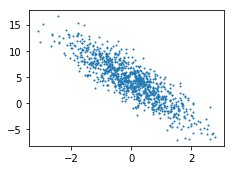

In [34]:
plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.scatter(features[:, 1].asnumpy(), h.asnumpy(), 1)
plt.show()

# 读取数据
在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回batch_size个随机样本的特征和标签。设批量大小（batch_size）为10。

In [61]:
batch_size = 10
def data_iter(batch_size, num_examples, features, labels): 
    indices = list(range(num_examples))
    # 打乱序号顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        # 取出batch_size个序号
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [56]:
for X, y in data_iter(batch_size, num_examples, features2, h):
    print(X, y)
    break

(
[[ 0.06481725  1.5408728   1.        ]
 [-0.8311352  -0.14018238  1.        ]
 [-1.0127133   0.6739536   1.        ]
 [ 2.5453484  -1.7833183   1.        ]
 [ 1.7378117  -0.82245797  1.        ]
 [-0.23488404 -1.25009     1.        ]
 [-0.32321382 -0.7613514   1.        ]
 [ 0.3421999   1.1175125   1.        ]
 [-0.5978728   1.3310035   1.        ]
 [-0.7392441   0.08465821  1.        ]]
<NDArray 10x3 @cpu(0)>, 
[-0.9093337   3.0143495  -0.11686897 15.353979   10.47198     7.980538
  6.142167    1.0848572  -1.5211577   2.4336739 ]
<NDArray 10 @cpu(0)>)


# 初始化模型参数

In [55]:
w = nd.random.normal(scale=0.01, shape=(1, num_inputs))
b = nd.zeros(shape=(1,1))
params = [w, b]

initial_theta=nd.concat(w,b,dim=1)
print(initial_theta)


[[0.01225252 0.00474241 0.        ]]
<NDArray 1x3 @cpu(0)>


In [57]:
def linreg(X, theta): 
    return nd.dot(X,theta.T ) 

In [58]:
def squared_loss(y_hat, y): 
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [72]:
initial_theta.attach_grad()
def sgd(theta, lr, batch_size):
    theta[:] = theta - lr * theta.grad / batch_size

In [75]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(1, num_epochs + 1):
    for X, y in data_iter(batch_size, num_examples, features2, h):
        with autograd.record():
            l = loss(net(X,initial_theta), y)
        l.backward()
        sgd(initial_theta, lr, batch_size)
    print("epoch %d, loss %f"
          % (epoch, loss(net(features2, initial_theta), h).mean().asnumpy()))

epoch 1, loss 0.000000
epoch 2, loss 0.000000
epoch 3, loss 0.000000


In [76]:
initial_theta.T


[[ 2.        -3.3999999  4.199994 ]]
<NDArray 1x3 @cpu(0)>

In [77]:
theta


[ 2.  -3.4  4.2]
<NDArray 3 @cpu(0)>